# Linear Regression on the Boston Housing Dataset

#### In this project, I will be creating Linear Regression models of the Boston Housing Dataset. I will implement:
* simple linear regression manually (both before and after removing outliers)
* simple linear regression with scikit-learn
* multiple linear regression manually (with scikit-learn for the simple linear regression portions)
* multiple linear regression entirely with scikit-learn

## Used Packages & Imported Data:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

%matplotlib inline

# import data from csv file
data = pd.read_csv('data/bostonhousing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Good Practices: Ensuring the Data Matches a Normal Distribution

Graph the distributions of the columns, as linear regression only works if the data fits a normal distribution

<Axes: ylabel='Density'>

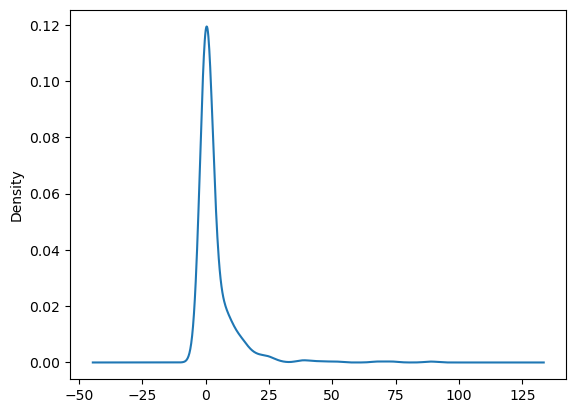

In [2]:
# this seems alright, if a tad skewed
data['CRIM'].plot(kind='kde')

<Axes: ylabel='Density'>

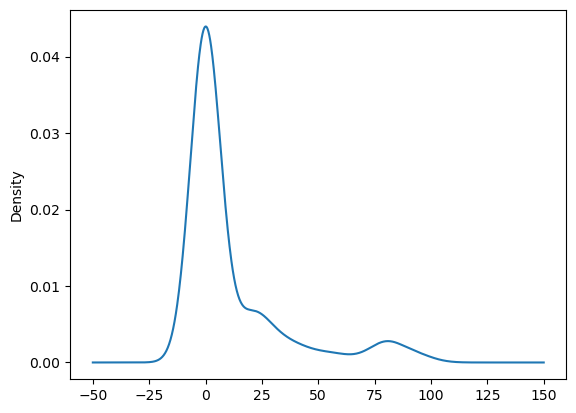

In [3]:
# this one seems alright, if a tad skewed
data['ZN'].plot(kind='kde')

<Axes: ylabel='Density'>

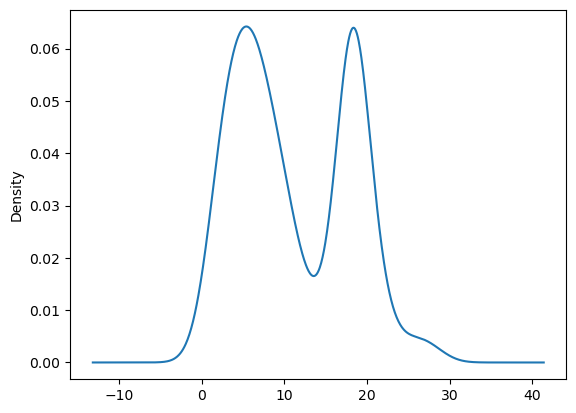

In [4]:
# this one seems questionable
data['INDUS'].plot(kind='kde')

<Axes: ylabel='Density'>

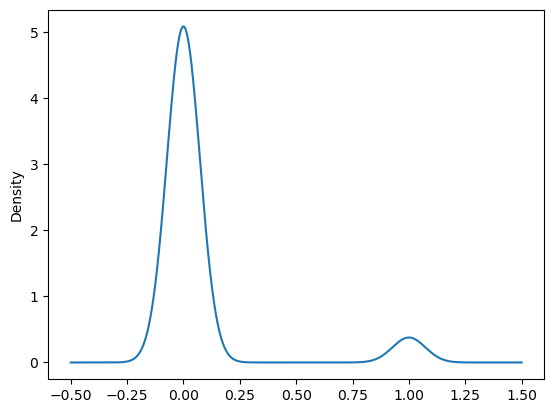

In [5]:
# this one seems alright
data['CHAS'].plot(kind='kde')

<Axes: ylabel='Density'>

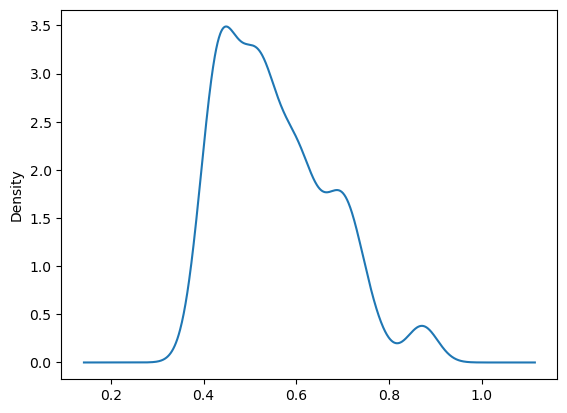

In [6]:
# this one seems alright, if a tad skewed
data['NOX'].plot(kind='kde')

<Axes: ylabel='Density'>

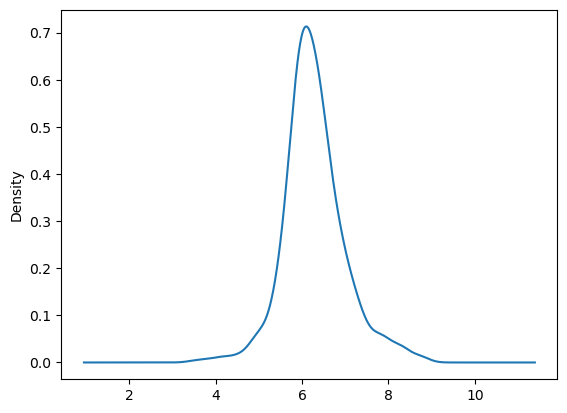

In [7]:
# this one seems alright
data['RM'].plot(kind='kde')

<Axes: ylabel='Density'>

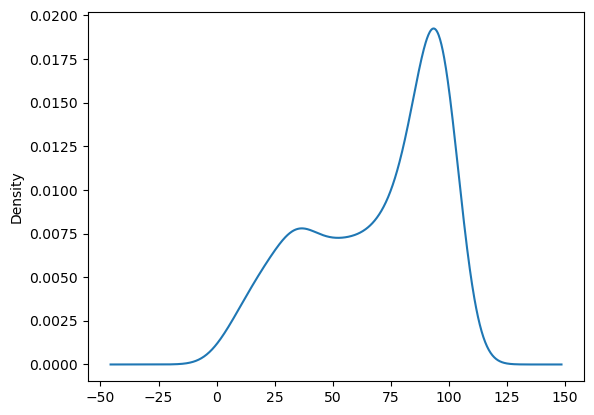

In [8]:
# this one seems alright, if a tad skewed
data['AGE'].plot(kind='kde')

<Axes: ylabel='Density'>

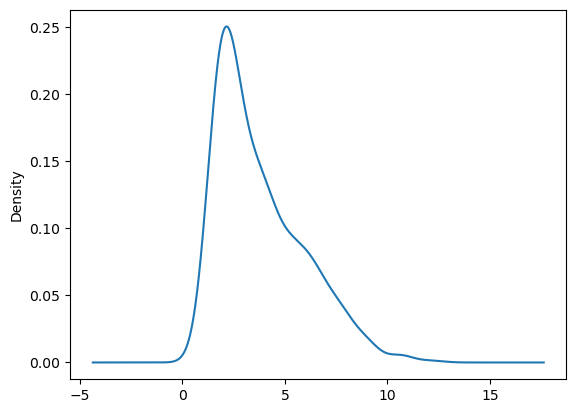

In [9]:
# this one seems alright, if a tad skewed
data['DIS'].plot(kind='kde')

<Axes: ylabel='Density'>

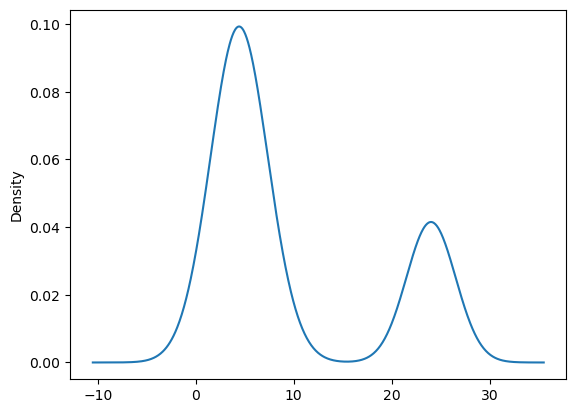

In [10]:
# this one seems alright, if a tad questionable
data['RAD'].plot(kind='kde')

<Axes: ylabel='Density'>

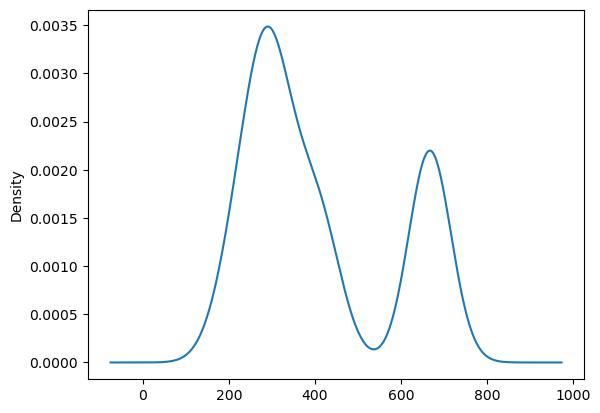

In [11]:
# this one seems questionable
data['TAX'].plot(kind='kde')

<Axes: ylabel='Density'>

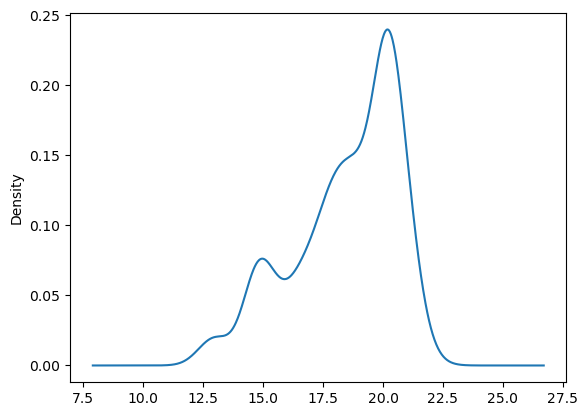

In [12]:
# this one seems alright, if a tad skewed
data['PTRATIO'].plot(kind='kde')

<Axes: ylabel='Density'>

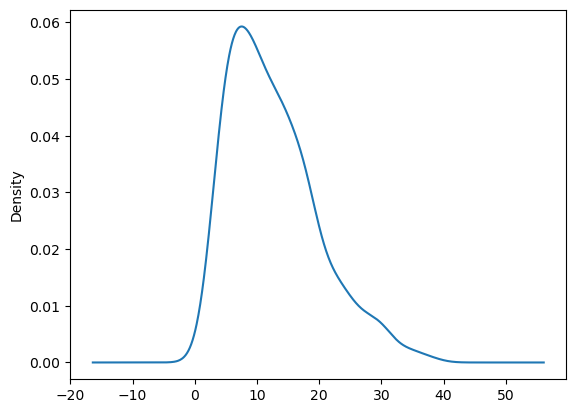

In [13]:
# this one seems alright, if a tad skewed
data['LSTAT'].plot(kind='kde')

<Axes: ylabel='Density'>

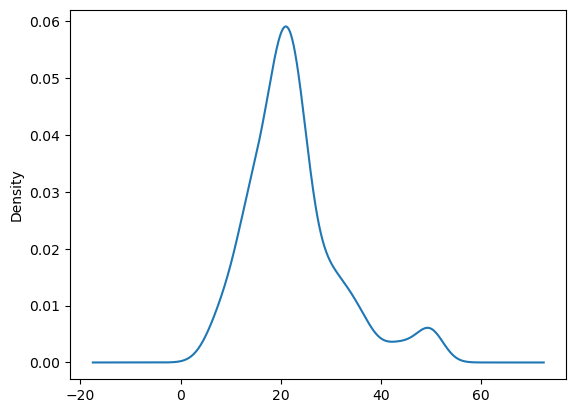

In [14]:
# this one seems alright
data['MEDV'].plot(kind='kde')

## Good Practices: Replacing Missing Values

Run the cell below before you run the rest of the program. Before preprocessing any of the data, you should check for NaN (missing) values and replace them with other values, such as the mean, median or mode (but NEVER delete the entry, unless most of it [> 50.0%] is missing).

In [15]:
# clearly, there are no missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
# when there are missing values, though, they can be replaced with other values
def replace_missing(df):
    # numeric columns
    for col in df.select_dtypes(include=['number']):
        df[col].fillna(df[col].median(), inplace=True)
    # categorical columns - not utilized here
    for col in df.select_dtypes(include=['object']):
        df[col].fillna(df[col].mode()[0], inplace=True)

In [17]:
replace_missing(data)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Simple Linear Regression: Manual Implementation Prerequisites

In order to manually implement simple linear regression, you need to find the slope and slope-intercept of the line of best fit, and to do that, you need the standard deviations of the original lists of x-values and y-values, and the correlation coefficient given the lists of x-values and y-values.

Run the cell below before you run the rest of the program. In order for the code to manually implement simple linear regression to work, the functions to provide the program with the predicted values using the standard deviation and correlation coefficient formulas need to be implemented.

In [18]:
# Finds the predicted values given list of x-values and list of y-values
# Parameter: x_values, a list; y_values, a list
# Precondition: x_values and y_values are lists of solely numeric values
# Return: returns the predicted values
# Postcondition: Returned value must be a numeric value
def find_predicted(x_values, y_values):
    slope = find_r(x_values, y_values) * find_stdev(y_values) / find_stdev(x_values)
    intercept = np.mean(y_values) - np.mean(x_values) * slope
    return x_values * slope + intercept

# Finds the standard deviation in a list of numbers
# Parameter: values, a list
# Precondition: values is a list of solely numeric values
# Return: returns the average of all of the numbers in values
# Postcondition: Returned value must be a numeric value
def find_stdev(values):
    vals = (values - np.mean(values)) ** 2
    s = np.sum(vals)
    return math.sqrt(s / (len(vals) - 1))

# Finds the correlation coefficient r given list of x-values and list of y-values
# Parameter: x_values, a list; y_values, a list
# Precondition: x_values and y_values are lists of solely numeric values
# Return: returns the correlation coefficient value
# Postcondition: Returned value must be a numeric value
def find_r(x_values, y_values):
    x_vals = x_values - np.mean(x_values)
    y_vals = y_values - np.mean(y_values)
    numerator = np.sum(x_vals * y_vals)
    denominator = math.sqrt(np.sum(x_vals ** 2) * np.sum(y_vals ** 2))
    return numerator / denominator

## Simple Linear Regression: Manual Implementation (Before Removing Outliers)

### Creating a Scatterplot of the Data (Before Removing Outliers)

First, we will visualize the data of two axes using a scatterplot, without running any data analysis methods and before we try removing outliers.

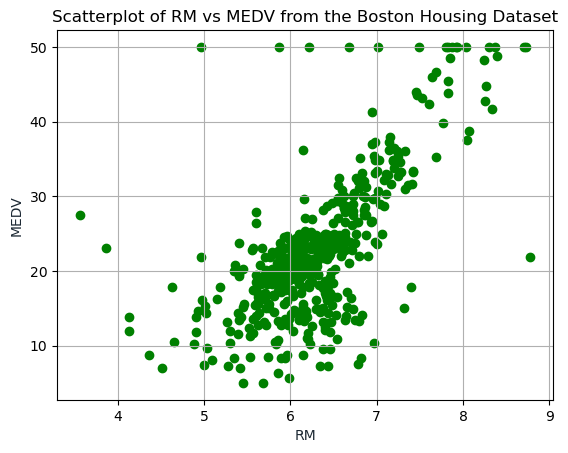

In [19]:
# establish RM and MEDV as independent and dependent variables
x_values = data['RM']
y_values = data['MEDV']

# plot scatterplot of original points
plt.scatter(x_values, y_values, color='g')

# graph details, and display
plt.title('Scatterplot of RM vs MEDV from the Boston Housing Dataset')
plt.xlabel('RM', color='#1C2833')
plt.ylabel('MEDV', color='#1C2833')
plt.grid()
plt.show()

### Creating (and Graphing) a Simple Linear Regression Fit (Before Removing Outliers)

Now, we will visualize the linear regression model of two axes, without running any data analysis methods and before we try removing outliers.

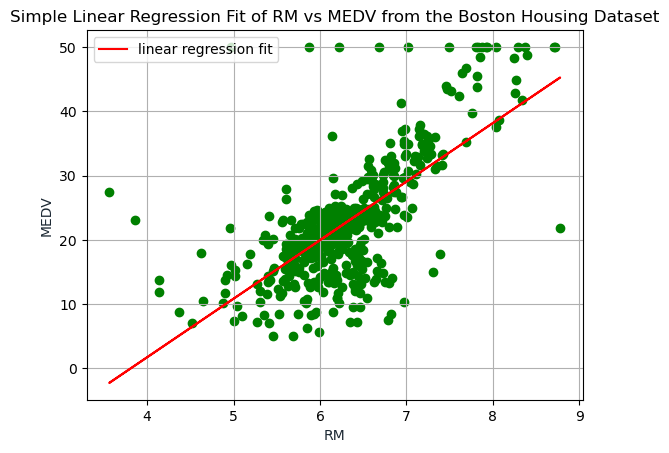

In [20]:
# find predicted values
predicted_values = find_predicted(x_values, y_values)

# plot scatterplot of original points
plt.scatter(x_values, y_values, color='g')

# plot linear regression model
plt.plot(x_values, predicted_values, '-r', label='linear regression fit')

# graph details, and display
plt.title('Simple Linear Regression Fit of RM vs MEDV from the Boston Housing Dataset')
plt.xlabel('RM', color='#1C2833')
plt.ylabel('MEDV', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Good Practices (continued): Removing Outliers

Creating and using a method to replace outliers with an upper and lower whisker equivalent to the first and third quartile, respectively, modified by 1.5 times the inter-quartile range (upper and lower whiskers have been increased and decreased by this amount, respectively).

In [21]:
def impute_outliers(df, column):
    # finding first quantile
    Q1 = df[column].quantile(0.25)
    # finding third quantile
    Q3 = df[column].quantile(0.75)
    
    # finding inter-quartile range
    IQR = Q3 - Q1
    
    # finding upper and lower whiskers (to replace outliers)
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    # replacing outliers with whiskers
    data.loc[data[column] >= Upper_Whisker, column] = Upper_Whisker
    data.loc[data[column] <= Lower_Whisker, column] = Lower_Whisker

In [22]:
for col in data:
    impute_outliers(data, col)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


### Ensuring the Data Matches a Normal Distribution (After Removing Outliers)

<Axes: ylabel='Density'>

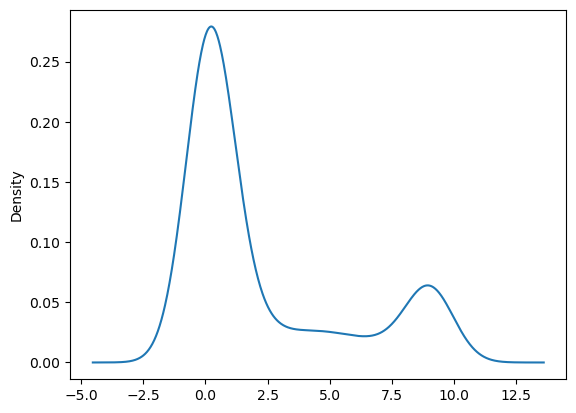

In [23]:
# this seems alright, if a tad skewed
data['CRIM'].plot(kind='kde')

<Axes: ylabel='Density'>

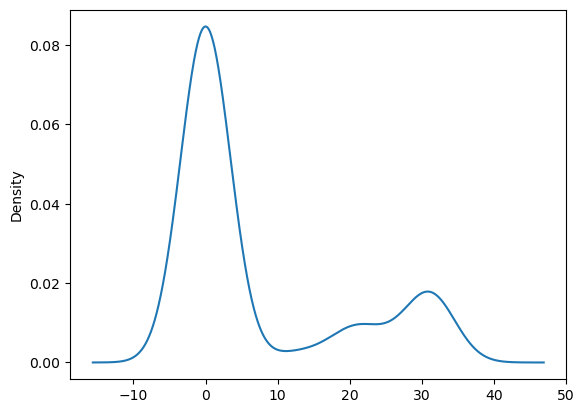

In [24]:
# this one seems alright, if a tad skewed
data['ZN'].plot(kind='kde')

<Axes: ylabel='Density'>

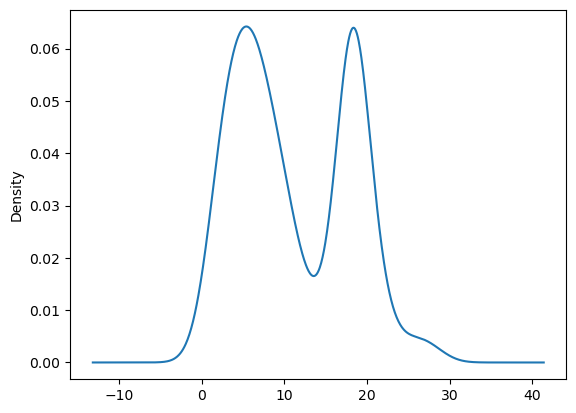

In [25]:
# this one seems questionable
data['INDUS'].plot(kind='kde')

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

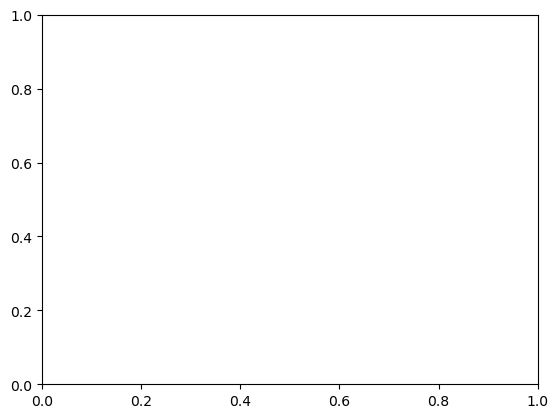

In [28]:
# this one seems alright
data['CHAS'].plot(kind='kde')

<Axes: ylabel='Density'>

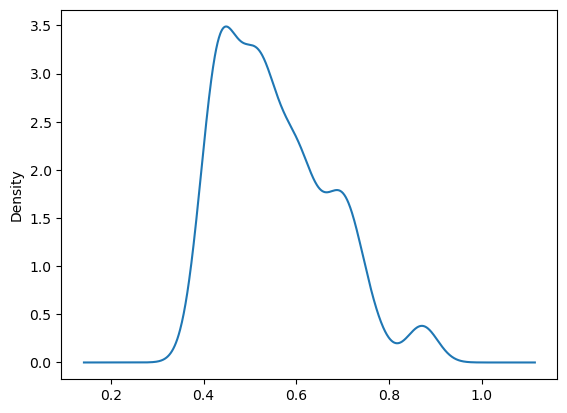

In [29]:
# this one seems alright, if a tad skewed
data['NOX'].plot(kind='kde')

In [ ]:
# this one seems alright
data['RM'].plot(kind='kde')

In [ ]:
# this one seems alright, if a tad skewed
data['AGE'].plot(kind='kde')

In [ ]:
# this one seems alright, if a tad skewed
data['DIS'].plot(kind='kde')

In [ ]:
# this one seems alright, if a tad questionable
data['RAD'].plot(kind='kde')

In [ ]:
# this one seems questionable
data['TAX'].plot(kind='kde')

In [ ]:
# this one seems alright, if a tad skewed
data['PTRATIO'].plot(kind='kde')

In [ ]:
# this one seems alright, if a tad skewed
data['LSTAT'].plot(kind='kde')

In [ ]:
# this one seems alright
data['MEDV'].plot(kind='kde')

## Simple Linear Regression: Manual Implementation (After Removing Outliers)

### Creating a Scatterplot of the Data (After Removing Outliers)

First, we will visualize the data of two axes using a scatterplot, without running any data analysis methods.

In [ ]:
# establish RM and MEDV as independent and dependent variables
x_values = data['RM']
y_values = data['MEDV']

# plot scatterplot of original points
plt.scatter(x_values, y_values, color='g')

# graph details, and display
plt.title('Scatterplot of RM vs MEDV from the Boston Housing Dataset')
plt.xlabel('RM', color='#1C2833')
plt.ylabel('MEDV', color='#1C2833')
plt.grid()
plt.show()

### Creating (and Graphing) a Simple Linear Regression Fit (After Removing Outliers)

Now, we will visualize the linear regression model of two axes, without running any data analysis methods.

In [ ]:
# find predicted values
predicted_values = find_predicted(x_values, y_values)

# plot scatterplot of original points
plt.scatter(x_values, y_values, color='g')

# plot linear regression model
plt.plot(x_values, predicted_values, '-r', label='linear regression fit')

# graph details, and display
plt.title('Simple Linear Regression Fit of RM vs MEDV from the Boston Housing Dataset')
plt.xlabel('RM', color='#1C2833')
plt.ylabel('MEDV', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Multiple Linear Regression: Manual Implementation

### Scaling all Data to Same Scale